# KNN 算法原理及实现

## 原理
    1、kNN(k-NearestNeighbor),即k最近邻算法。先找出与测试样本距离最近的K个训练样本的分类标签数据，然后依据多数表决等决策规则进行对测试样本预测。即选择k个最相似数据中出现次数最多的分类，作为新数据的分类。
    2、既可以用来做分类（天然支持多分类），也可以用来做回归。

## 实现
    1、三个基本要素：
        距离度量[欧氏距离、曼哈顿距离、余弦系数]
        k值[用几个训练样本]
        分类决策规则[一般是多数表决]
    2、实现流程:
        ①、计算测试对象到训练集中每个对象的距离
        ②、按照距离的远近排序(升序)
        ③、选取与当前测试对象最近的k的训练对象，作为该测试对象的邻居
        ④、统计这k个邻居的类别频次
        ⑤、k个邻居里频次最高的类别，即为测试对象的类别
       

# 代码实现

## 手工代码实现

### 导入库

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt   
from collections import Counter

### 训练集

In [7]:
# raw_data_x是特征，raw_data_y是标签，0为良性，1为恶性
# raw_data_x[:,0]是肿块大小,raw_data_x[:,1]是发现时间
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343853454, 3.368312451],
              [3.582294121, 4.679917921],
              [2.280362211, 2.866990212],
              [7.423436752, 4.685324231],
              [5.745231231, 3.532131321],
              [9.172112222, 2.511113104],
              [7.927841231, 3.421455345],
              [7.939831414, 0.791631213]
             ]
raw_data_y=[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# 设置训练组

X_train=np.array(raw_data_X)
y_train=np.array(raw_data_y)

### 查看数据
 - 使用可视化查看数据

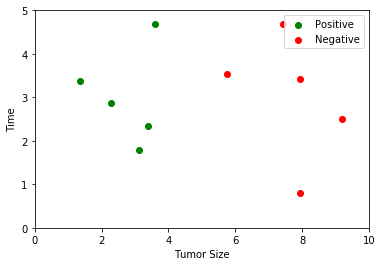

In [9]:
# 数据可视化
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g',label='Positive')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r',label='Negative')
plt.xlabel('Tumor Size')
plt.ylabel('Time')
plt.axis([0,10,0,5])
plt.legend()
plt.show()

### 测试样本 
x=[8.90933607318, 3.365731514] 

In [4]:
x=[8.90933607318, 3.365731514]

### 求距离
-- 采用欧氏距离计算
$$
\sqrt{\sum (x_i-y_i)^2}
$$

In [24]:
distances=[]  # 用来记录x到样本数据集中每个点的距离
for x_train in X_train:
    d=sqrt(np.sum((x_train-x)**2))
    distances.append(d)

In [26]:
# 使用列表生成器，一行就能搞定，对于X_train中的每一个元素x_train都进行前面的运算，把结果生成一个列表
distances=[sqrt(np.sum((x_train-x)**2)) for x_train in X_train]

In [28]:
distances

[5.611968000921151,
 6.011747706769277,
 7.565483059418645,
 5.486753308891268,
 6.647709180746875,
 1.9872648870854204,
 3.168477291709152,
 0.8941051007010301,
 0.9830754144862234,
 2.7506238644678445]

In [29]:
# np.argsort(array) 对一个数组进行排序，返回的是相应的排序后结果的索引,默认是升序排序
nearest=np.argsort(distances)
nearest
# 结果的含义是：距离最小的点在distances数组中的索引是7，第二小的点索引是8... 近到远是哪些点

array([7, 8, 5, 9, 6, 3, 0, 1, 4, 2], dtype=int64)

### 选K值

In [30]:
# 暂定6
k=6
topK_y=[y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

### 决策规则
- 采用少数服从多数

In [32]:
votes=Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [37]:
# Counter.most_common(n) 找出票数最多的n个元素，返回的是一个列表，
#    列表中的每个元素是一个元组，元组中第一个元素是对应的元素是谁，第二个元素是频次
votes.most_common(1)

[(1, 5)]

In [43]:
# 获取预测结果
predict_y=votes.most_common(1)[0][0]
predict_y

1

### 完整代码
- 参考代码：https://github.com/japsonzbz/ML_Algorithms 

#### 封装kNN算法包

In [45]:
import numpy as np
from math import sqrt
from collections import Counter

class kNNClassifier:
    
    def __init__(self,k):
        """初始化分类器"""
        assert k>=1,"k must be valid" # 设置断言
        self.k=k
        self._X_train=None  
        self._y_train=None
        
    def fit(self,X_train,y_train):
        assert X_train.shape[0]==y_train.shape[0],\
            "the size of X_train must be equal to the size of y_train"
        assert self.k<=X_train.shape[0],\
            "the size of X_train must be at least k"
        self._X_train=X_train
        self._y_train=y_train
        return self
    
    def predict(self,X_predict):
        """给定待预测数据集X_predict,返回表示X_predict结果的向量"""
        assert self._X_train is not None and self._y_train is not None,\
            "must fit before predict!"
        assert X_predict.shape[1]==self._X_train.shape[1],\
            "the feature number of X_predict must be equal to X_train"
        y_predict=[self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self,x):
        distances=[sqrt(np.sum((x_train-x)**2)) for x_train in self._X_train]
        nearest=np.argsort(distances)
        topK_y=[self._y_train[i] for i in nearest]
        votes=Counter(topK_y)
        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        return "kNN(k=%d)" % self.k

#### 使用算法预测

In [54]:
%run myML_Algorithm/kNN.py

knn_clf=kNNClassifier(k=6)
knn_clf.fit(X_train,y_train)
X_predict=np.array(x).reshape(1,-1)
y_predict=knn_clf.predict(X_predict)
y_predict

array([1])

## sklearn实现kNN
 - sklearn实现过程先实例一个算法对象->创建模型(用fit方法从训练集数据中学习样本行为并形成模型)->预测(使用predict方法对测试样本预测)->得到结果

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### 实例算法对象

In [ ]:
# 创建kNN_classifier实例
kNN_classifier=KNeighborsClassifier(n_neighbors=6)

### 创建模型

In [11]:
# kNN_classifier做一遍fit(拟合)的过程，没有返回值，模型就存储在kNN_classifier实例中
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### 预测并输出结果

In [15]:
# kNN进行预测predict，需要传入一个矩阵，而不能是一个数组。
#reshape()成一个二维数组，第一个参数是1表示只有一个数据，
#  第二个参数-1，numpy自动决定第二维度有多少

y_predict=kNN_classifier.predict(np.array(x).reshape(1,-1))
y_predict

array([1])

## KNeighborsClassifier 解读

### 参数解读
- n_neighbors: int, 可选参数(默认为 5)。用于kneighbors查询的默认邻居的数量
- weights（权重）: str or callable(自定义类型), 可选参数(默认为 ‘uniform’)。样本存在许多异常值时，需要使用这个参数消除噪音影响。用于预测的权重参数，可选参数如下：
        uniform : 统一的权重. 在每一个邻居区域里的点的权重都是一样的。
        distance : 权重点等于他们距离的倒数。使用此函数，更近的邻居对于所预测的点的影响更大。
        [callable] : 一个用户自定义的方法，此方法接收一个距离的数组，然后返回一个相同形状并且包含权重的数组。
- algorithm（算法）: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, 可选参数（默认为 'auto'）。计算最近邻居用的算法：
        ball_tree 使用算法BallTree
        kd_tree 使用算法KDTree
        brute 使用暴力搜索
        auto 会基于传入fit方法的内容，选择最合适的算法。注意 : 如果传入fit方法的输入是稀疏的，将会重载参数设置，直接使用暴力搜索。
- leaf_size（叶子数量）: int, 可选参数(默认为 30)。传入BallTree或者KDTree算法的叶子数量。此参数会影响构建、查询BallTree或者KDTree的速度，以及存储BallTree或者KDTree所需要的内存大小。此可选参数根据是否是问题所需选择性使用。
- p: integer, 可选参数(默认为 2)。用于Minkowski metric（闵可夫斯基空间）的超参数。p = 1, 相当于使用曼哈顿距离，p = 2, 相当于使用欧几里得距离]，对于任何 p ，使用的是闵可夫斯基空间。
- metric（矩阵）: string or callable, 默认为 ‘minkowski’。用于树的距离矩阵。默认为闵可夫斯基空间，如果和p=2一块使用相当于使用标准欧几里得矩阵. 所有可用的矩阵列表请查询 DistanceMetric 的文档。
- metric_params（矩阵参数）: dict, 可选参数(默认为 None)。给矩阵方法使用的其他的关键词参数。
- n_jobs: int, 可选参数(默认为 1)。用于搜索邻居的，可并行运行的任务数量。如果为-1, 任务数量设置为CPU核的数量。不会影响fit

### 方法使用说明
- fit(X, y)：使用X作为训练数据，y作为目标值（类似于标签）来拟合模型。
- get_params([deep])：获取估值器的参数。
- neighbors([X, n_neighbors, return_distance])：查找一个或几个点的K个邻居。
- kneighbors_graph([X, n_neighbors, mode])：计算在X数组中每个点的k邻居的（权重）图。
- predict(X)：给提供的数据预测对应的标签。
- predict_proba(X)：返回测试数据X的概率估值。
- score(X, y[, sample_weight])：返回给定测试数据和标签的平均准确值。
- set_params(**params)：设置估值器的参数。

# 问题

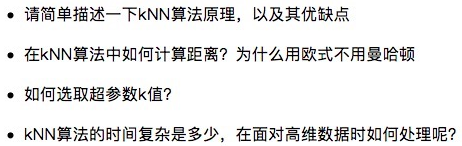